In [1]:
import imblearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("mice_scaled.csv")

In [3]:
data.head()

,Attr2,Attr3,Attr4,Attr5,Attr6,Attr9,Attr10,Attr13,Attr19,Attr21,...,Attr59,Attr61,Attr64,Attr65,Attr66,Attr67,Attr68,Attr69,Attr70,class
0,-0.564475,-0.173956,-0.124649,0.012790,-0.014341,-0.451866,0.321246,-0.004382,-0.518534,-0.021175,...,-0.018746,-0.711244,-1.053473,-0.126576,0.402104,-0.058312,0.017091,-0.205098,0,0
1,-1.698654,1.841882,1.129210,0.011900,-0.221494,-0.386067,0.779132,0.060436,-0.181104,0.029315,...,-0.047671,2.085748,2.083580,-1.260417,0.206697,0.197628,-0.035273,16.246606,1,0
2,-0.014504,0.018601,-0.329322,0.012822,-0.009368,0.074404,0.103175,-0.030770,-1.019254,-0.140062,...,-0.035084,-1.074730,-0.268523,-0.367238,0.838218,-0.364028,0.004898,-0.035524,0,0
3,-0.995975,1.018673,0.878251,0.028528,0.037467,-0.376297,0.510253,0.006106,2.226964,-0.043613,...,-0.046055,0.449361,0.294264,0.090047,-1.226899,0.011336,-0.031391,-0.170398,0,0
4,-0.035359,-0.373743,-0.607667,-0.001269,-0.009368,0.464720,0.113260,0.002117,0.293229,-0.023797,...,-0.046561,-0.076763,-0.291498,-0.010448,-0.354641,0.064521,0.561108,-0.125715,0,0


In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [5]:
from sklearn.metrics import confusion_matrix
def plot_cm(classifier, predictions):
    cm = confusion_matrix(y_test, predictions)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Bankrupted','Not Bankrupted']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))

In [6]:
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_aucprc(classifier, scores):
    precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=0)
    average_precision = average_precision_score(y_test, scores)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

# Classification
## Decision Tree

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
data_X = data.iloc[:, :-1]
data_y = data["class"]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, 
                                                    data_y,
                                                   test_size = 0.3,
                                                   random_state = 24)

In [19]:
model = DecisionTreeClassifier()

In [20]:
re_stf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(model, X_train, Y_train, scoring = "f1_micro", cv = re_stf)

In [33]:
print("Mean CV F1 : %.3f"% np.mean(scores))

Mean CV F1 : 0.912


In [21]:
scores = cross_val_score(model, X_train, Y_train, scoring = "roc_auc", cv = re_stf)

In [35]:
print("Mean CV ROC_AUC : %.3f"% np.mean(scores))

Mean CV ROC_AUC : 0.609


In [22]:
from sklearn.metrics import roc_auc_score

In [37]:
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [39]:
print("F1 : %.3f" % f1_score(Y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y))

F1 : 0.908
ROC AUC : 0.561


## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
forest = RandomForestClassifier(n_estimators=500, random_state=24)

In [42]:
scores = cross_val_score(forest, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(scores))
scores = cross_val_score(forest, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(scores))

Mean CV F1 : 0.952
Mean CV ROC_AUC : 0.817


In [43]:
forest.fit(X_train, Y_train)
pred_y = forest.predict(X_test)
print("F1 : %.3f" % f1_score(Y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y))

F1 : 0.954
ROC AUC : 0.585


## XGBOOST

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
n_estimators = [200, 300, 400, 500, 600]
learning_rate = [0.01, 0.05, 0.1, 0.15, 0.2]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)

In [46]:
xgb_greedy_model = XGBClassifier()
grid_search = GridSearchCV(xgb_greedy_model, param_grid, scoring="roc_auc", cv=re_stf)
grid_result = grid_search.fit(X_train, Y_train)

Best: 0.845000 using {'learning_rate': 0.05, 'n_estimators': 300}
0.808005 (0.036860) with: {'learning_rate': 0.01, 'n_estimators': 200}
0.817551 (0.039500) with: {'learning_rate': 0.01, 'n_estimators': 300}
0.828250 (0.037218) with: {'learning_rate': 0.01, 'n_estimators': 400}
0.833862 (0.035988) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.836650 (0.034597) with: {'learning_rate': 0.01, 'n_estimators': 600}
0.842836 (0.032283) with: {'learning_rate': 0.05, 'n_estimators': 200}
0.845000 (0.031421) with: {'learning_rate': 0.05, 'n_estimators': 300}
0.842993 (0.031560) with: {'learning_rate': 0.05, 'n_estimators': 400}
0.840559 (0.032336) with: {'learning_rate': 0.05, 'n_estimators': 500}
0.837079 (0.032352) with: {'learning_rate': 0.05, 'n_estimators': 600}
0.844085 (0.032750) with: {'learning_rate': 0.1, 'n_estimators': 200}
0.839718 (0.033177) with: {'learning_rate': 0.1, 'n_estimators': 300}
0.835679 (0.032530) with: {'learning_rate': 0.1, 'n_estimators': 400}
0.834238 (0.03

Text(0, 0.5, 'ROC Score')

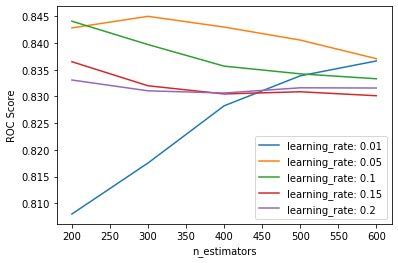

In [47]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('ROC Score')

## SMOTE

## Decision Tree

In [48]:
steps = [("over", SMOTE()), ("model", DecisionTreeClassifier())]
pipeline = Pipeline(steps = steps)

In [49]:
scores2 = cross_val_score(pipeline, X_train, Y_train, scoring = "f1_micro", cv = re_stf)

In [50]:
print("Mean CV F1 : %.3f"% np.mean(scores2))

Mean CV F1 : 0.848


In [51]:
scores2 = cross_val_score(pipeline, X_train, Y_train, scoring = "roc_auc", cv = re_stf)

In [52]:
print("Mean CV ROC_AUC : %.3f"% np.mean(scores2))

Mean CV ROC_AUC : 0.626


In [53]:
pipeline.fit(X_train, Y_train)
pred_y2 = pipeline.predict(X_test)

In [54]:
print("F1 : %.3f" % f1_score(Y_test, pred_y2, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y2))

F1 : 0.848
ROC AUC : 0.612


## Random Forest

In [55]:
steps = [("over", SMOTE()), ("model", RandomForestClassifier(n_estimators=500, random_state=24))]
pipeline2 = Pipeline(steps = steps)

In [56]:
scores2 = cross_val_score(pipeline2, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(scores2))

Mean CV F1 : 0.922


In [57]:
scores2 = cross_val_score(pipeline2, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(scores2))

Mean CV ROC_AUC : 0.811


In [58]:
pipeline2.fit(X_train, Y_train)
pred_y2 = pipeline2.predict(X_test)

In [59]:
print("F1 : %.3f" % f1_score(Y_test, pred_y2, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y2))

F1 : 0.928
ROC AUC : 0.608


## XGBOOST

In [63]:
steps = [("over", SMOTE()), ("model", XGBClassifier())]
pipeline2 = Pipeline(steps = steps)

In [64]:
def grid_smote_only_search(model) :
    
    steps = [("over", SMOTE()), ("model", model)]
    pipeline = Pipeline(steps = steps)

    f1_scores = cross_val_score(pipeline, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
    print("Mean F1 : %.3f" % (np.mean(f1_scores)))
    roc_scores = cross_val_score(pipeline, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
    print("Mean ROC AUC : %.3f" % (np.mean(roc_scores)))

    pipeline.fit(X_train, Y_train)
    pred_y = pipeline.predict(X_test)
    print("\nF1 : %.3f" % f1_score(Y_test, pred_y, average = 'micro'))
    print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y))

In [65]:
for n in n_estimators:
    for rate in learning_rate:
        print("\n N_estimators : ", n, " & Learning_rate : ", rate)
        grid_smote_only_search(XGBClassifier(n_estimators = n, learning_rate = rate))


 N_estimators :  200  & Learning_rate :  0.01
Mean F1 : 0.760
Mean ROC AUC : 0.802

F1 : 0.744
ROC AUC : 0.727

 N_estimators :  200  & Learning_rate :  0.05
Mean F1 : 0.846
Mean ROC AUC : 0.826

F1 : 0.847
ROC AUC : 0.722

 N_estimators :  200  & Learning_rate :  0.1
Mean F1 : 0.876
Mean ROC AUC : 0.818

F1 : 0.883
ROC AUC : 0.741

 N_estimators :  200  & Learning_rate :  0.15
Mean F1 : 0.889
Mean ROC AUC : 0.814

F1 : 0.893
ROC AUC : 0.714

 N_estimators :  200  & Learning_rate :  0.2
Mean F1 : 0.896
Mean ROC AUC : 0.802

F1 : 0.905
ROC AUC : 0.692

 N_estimators :  300  & Learning_rate :  0.01
Mean F1 : 0.770
Mean ROC AUC : 0.809

F1 : 0.758
ROC AUC : 0.707

 N_estimators :  300  & Learning_rate :  0.05
Mean F1 : 0.863
Mean ROC AUC : 0.819

F1 : 0.865
ROC AUC : 0.708

 N_estimators :  300  & Learning_rate :  0.1
Mean F1 : 0.889
Mean ROC AUC : 0.811

F1 : 0.906
ROC AUC : 0.725

 N_estimators :  300  & Learning_rate :  0.15
Mean F1 : 0.901
Mean ROC AUC : 0.807

F1 : 0.906
ROC AUC : 0

KeyboardInterrupt: 

In [69]:
#얘들은 나중에 돌려보기
#pred_y = xgb_model.predict(X_test)
#scores = xgb_model.predict_proba(X_test)[:,1]

#plot_cm(xgb_model, pred_y)
#plot_aucprc(xgb_model, scores)

# SMOTE combined with Undersampling
## Decision Tree

In [70]:
over2 = SMOTE(sampling_strategy = 0.1)
under2 = RandomUnderSampler(sampling_strategy = 0.5)
steps2 = [('over', over2), ('under', under2), ('model', DecisionTreeClassifier())]
pipeline2 = Pipeline(steps = steps2)

In [71]:
f1_scores2 = cross_val_score(pipeline2, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(f1_scores2))

Mean CV F1 : 0.794


In [72]:
roc_scores2 = cross_val_score(pipeline2, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(roc_scores2))

Mean CV ROC_AUC : 0.649


In [73]:
pipeline2.fit(X_train, Y_train)
pred_y2 = pipeline2.predict(X_test)

In [74]:
print("F1 : %.3f" % f1_score(Y_test, pred_y2, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y2))

F1 : 0.770
ROC AUC : 0.631


## Random Forest

In [75]:
steps3 = [('over', over2), ('under', under2), ('model', RandomForestClassifier(n_estimators=500, random_state=24))]
pipeline3 = Pipeline(steps = steps3)

In [76]:
f1_scores3 = cross_val_score(pipeline3, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(f1_scores3))

Mean CV F1 : 0.895


In [77]:
roc_scores3 = cross_val_score(pipeline3, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(roc_scores3))

Mean CV ROC_AUC : 0.822


In [78]:
pipeline3.fit(X_train, Y_train)
pred_y3 = pipeline3.predict(X_test)

In [79]:
print("F1 : %.3f" % f1_score(Y_test, pred_y3, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y3))

F1 : 0.886
ROC AUC : 0.669


## GRID SEARCH
## Decision Tree

In [30]:
def grid_smote_search(lst, model) :
    
    for k in lst:
        over4 = SMOTE(sampling_strategy = 0.1, k_neighbors = k)
        under4 = RandomUnderSampler(sampling_strategy = 0.5)
        steps4 = [("over", over4), ("under", under4), ("model", model)]
        pipeline4 = Pipeline(steps = steps4)

        print("\n------- k = ", k,"-------")
        f1_scores4 = cross_val_score(pipeline4, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
        print("Mean F1 : %.3f" % (np.mean(f1_scores4)))
        roc_scores4 = cross_val_score(pipeline4, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
        print("Mean ROC AUC : %.3f" % (np.mean(roc_scores4)))

        pipeline4.fit(X_train, Y_train)
        pred_y4 = pipeline4.predict(X_test)
        print("\nF1 : %.3f" % f1_score(Y_test, pred_y4, average = 'micro'))
        print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y4))

In [31]:
k_values = [1,2,3,4,5,6,7]

In [82]:
grid_smote_search(k_values, DecisionTreeClassifier())


------- k =  1 -------
Mean F1 : 0.796
Mean ROC AUC : 0.661

F1 : 0.788
ROC AUC : 0.636

------- k =  2 -------
Mean F1 : 0.791
Mean ROC AUC : 0.660

F1 : 0.788
ROC AUC : 0.617

------- k =  3 -------
Mean F1 : 0.794
Mean ROC AUC : 0.656

F1 : 0.792
ROC AUC : 0.606

------- k =  4 -------
Mean F1 : 0.793
Mean ROC AUC : 0.659

F1 : 0.777
ROC AUC : 0.620

------- k =  5 -------
Mean F1 : 0.792
Mean ROC AUC : 0.658

F1 : 0.784
ROC AUC : 0.629

------- k =  6 -------
Mean F1 : 0.782
Mean ROC AUC : 0.664

F1 : 0.788
ROC AUC : 0.645

------- k =  7 -------
Mean F1 : 0.791
Mean ROC AUC : 0.662

F1 : 0.779
ROC AUC : 0.704


## Random Forest

In [83]:
grid_smote_search(k_values, RandomForestClassifier(n_estimators=400))


------- k =  1 -------
Mean F1 : 0.902
Mean ROC AUC : 0.821

F1 : 0.903
ROC AUC : 0.678

------- k =  2 -------
Mean F1 : 0.901
Mean ROC AUC : 0.820

F1 : 0.905
ROC AUC : 0.688

------- k =  3 -------
Mean F1 : 0.898
Mean ROC AUC : 0.819

F1 : 0.903
ROC AUC : 0.682

------- k =  4 -------
Mean F1 : 0.900
Mean ROC AUC : 0.825

F1 : 0.901
ROC AUC : 0.672

------- k =  5 -------
Mean F1 : 0.899
Mean ROC AUC : 0.819

F1 : 0.902
ROC AUC : 0.682

------- k =  6 -------
Mean F1 : 0.897
Mean ROC AUC : 0.827

F1 : 0.894
ROC AUC : 0.692

------- k =  7 -------
Mean F1 : 0.894
Mean ROC AUC : 0.823

F1 : 0.894
ROC AUC : 0.682


In [84]:
grid_smote_search(k_values, RandomForestClassifier(n_estimators=500))


------- k =  1 -------
Mean F1 : 0.902
Mean ROC AUC : 0.823

F1 : 0.895
ROC AUC : 0.674

------- k =  2 -------
Mean F1 : 0.901
Mean ROC AUC : 0.829

F1 : 0.894
ROC AUC : 0.664

------- k =  3 -------
Mean F1 : 0.898
Mean ROC AUC : 0.823

F1 : 0.906
ROC AUC : 0.702

------- k =  4 -------
Mean F1 : 0.902
Mean ROC AUC : 0.822

F1 : 0.896
ROC AUC : 0.651

------- k =  5 -------
Mean F1 : 0.895
Mean ROC AUC : 0.821

F1 : 0.909
ROC AUC : 0.671

------- k =  6 -------
Mean F1 : 0.900
Mean ROC AUC : 0.819

F1 : 0.876
ROC AUC : 0.677

------- k =  7 -------
Mean F1 : 0.895
Mean ROC AUC : 0.822

F1 : 0.895
ROC AUC : 0.683


## XGBOOST

## 1) SMOTE만

In [16]:
n_estimators = [200, 300, 400, 500, 600]
learning_rate = [0.01, 0.05, 0.1, 0.15, 0.2]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)

In [26]:
X_resampled, y_resampled = SMOTE().fit_sample(X_train,list(Y_train))

In [98]:
xgb_model = XGBClassifier()

In [27]:
grid_search2 = GridSearchCV(xgb_model, param_grid, scoring="roc_auc", cv=re_stf)
grid_result2 = grid_search2.fit(X_resampled, y_resampled)

KeyboardInterrupt: 

Best: 0.993527 using {'learning_rate': 0.2, 'n_estimators': 600}
0.866146 (0.012245) with: {'learning_rate': 0.01, 'n_estimators': 200}
0.887215 (0.010869) with: {'learning_rate': 0.01, 'n_estimators': 300}
0.903020 (0.010544) with: {'learning_rate': 0.01, 'n_estimators': 400}
0.916284 (0.010131) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.927723 (0.009615) with: {'learning_rate': 0.01, 'n_estimators': 600}
0.952315 (0.008092) with: {'learning_rate': 0.05, 'n_estimators': 200}
0.964833 (0.006784) with: {'learning_rate': 0.05, 'n_estimators': 300}
0.972018 (0.006176) with: {'learning_rate': 0.05, 'n_estimators': 400}
0.976894 (0.005543) with: {'learning_rate': 0.05, 'n_estimators': 500}
0.980280 (0.004996) with: {'learning_rate': 0.05, 'n_estimators': 600}
0.971894 (0.006044) with: {'learning_rate': 0.1, 'n_estimators': 200}
0.980214 (0.005031) with: {'learning_rate': 0.1, 'n_estimators': 300}
0.984791 (0.004334) with: {'learning_rate': 0.1, 'n_estimators': 400}
0.987729 (0.003

Text(0, 0.5, 'ROC Score')

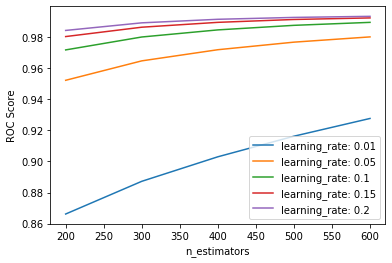

In [100]:
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('ROC Score')

In [116]:
means

array([0.86614634, 0.88721501, 0.90302036, 0.91628414, 0.92772275,
       0.9523148 , 0.9648328 , 0.9720181 , 0.97689394, 0.9802795 ,
       0.97189404, 0.9802144 , 0.98479111, 0.98772902, 0.98964576,
       0.98049695, 0.9865242 , 0.98965416, 0.99150296, 0.99251015,
       0.98444457, 0.98933737, 0.99162513, 0.99283269, 0.99352735])

In [117]:
best_xgb_model = XGBClassifier(learning_rate = 0.2, n_estimators = 600)

In [118]:
best_xgb_model.fit(X_resampled, y_resampled)
pred_y3 = best_xgb_model.predict(X_test)

In [119]:
print("F1 : %.3f" % f1_score(Y_test, pred_y3, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y3))

F1 : 0.923
ROC AUC : 0.665


In [120]:
no_smote_xgb = XGBClassifier(learning_rate = 0.05, n_estimators = 300)

In [121]:
no_smote_xgb.fit(X_train, Y_train)
pred_y4 = no_smote_xgb.predict(X_test)

In [122]:
print("F1 : %.3f" % f1_score(Y_test, pred_y4, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y4))

F1 : 0.954
ROC AUC : 0.566


## SMOTE + Under

In [10]:
X_resampled2, y_resampled2 = SMOTE(sampling_strategy = 0.5).fit_sample(X_train,list(Y_train))

In [11]:
X_sampled, y_sampled = RandomUnderSampler(sampling_strategy = 0.5).fit_sample(X_resampled2, y_resampled2)

In [14]:
xgb_model = XGBClassifier()

In [24]:
grid_search3 = GridSearchCV(xgb_model, param_grid, scoring="roc_auc", cv=re_stf)
grid_result3 = grid_search3.fit(X_sampled, y_sampled)

NameError: name 'grid_search2' is not defined

In [32]:
for n in n_estimators:
    for rate in learning_rate:
        print("\n N_estimators : ", n, " & Learning_rate : ", rate)
        grid_smote_search(k_values, XGBClassifier(n_estimators = n, learning_rate = rate))


 N_estimators :  200  & Learning_rate :  0.01

------- k =  1 -------
Mean F1 : 0.891
Mean ROC AUC : 0.825

F1 : 0.889
ROC AUC : 0.693

------- k =  2 -------
Mean F1 : 0.890
Mean ROC AUC : 0.827

F1 : 0.904
ROC AUC : 0.719

------- k =  3 -------
Mean F1 : 0.895
Mean ROC AUC : 0.828

F1 : 0.891
ROC AUC : 0.703

------- k =  4 -------
Mean F1 : 0.896
Mean ROC AUC : 0.828

F1 : 0.904
ROC AUC : 0.692

------- k =  5 -------
Mean F1 : 0.890
Mean ROC AUC : 0.820

F1 : 0.878
ROC AUC : 0.688

------- k =  6 -------
Mean F1 : 0.892
Mean ROC AUC : 0.823

F1 : 0.884
ROC AUC : 0.691

------- k =  7 -------
Mean F1 : 0.894
Mean ROC AUC : 0.822

F1 : 0.893
ROC AUC : 0.691

 N_estimators :  200  & Learning_rate :  0.05

------- k =  1 -------
Mean F1 : 0.898
Mean ROC AUC : 0.839

F1 : 0.907
ROC AUC : 0.712

------- k =  2 -------
Mean F1 : 0.903
Mean ROC AUC : 0.843

F1 : 0.888
ROC AUC : 0.688

------- k =  3 -------
Mean F1 : 0.899
Mean ROC AUC : 0.845

F1 : 0.902
ROC AUC : 0.705

------- k =  4 

Mean F1 : 0.897
Mean ROC AUC : 0.839

F1 : 0.896
ROC AUC : 0.683

------- k =  3 -------
Mean F1 : 0.895
Mean ROC AUC : 0.834

F1 : 0.895
ROC AUC : 0.696

------- k =  4 -------
Mean F1 : 0.892
Mean ROC AUC : 0.836

F1 : 0.897
ROC AUC : 0.702

------- k =  5 -------
Mean F1 : 0.895
Mean ROC AUC : 0.837

F1 : 0.888
ROC AUC : 0.720

------- k =  6 -------
Mean F1 : 0.891
Mean ROC AUC : 0.841

F1 : 0.901
ROC AUC : 0.704

------- k =  7 -------
Mean F1 : 0.895
Mean ROC AUC : 0.836

F1 : 0.887
ROC AUC : 0.706

 N_estimators :  400  & Learning_rate :  0.15

------- k =  1 -------
Mean F1 : 0.898
Mean ROC AUC : 0.833

F1 : 0.902
ROC AUC : 0.705

------- k =  2 -------
Mean F1 : 0.893
Mean ROC AUC : 0.836

F1 : 0.883
ROC AUC : 0.695

------- k =  3 -------
Mean F1 : 0.892
Mean ROC AUC : 0.836

F1 : 0.891
ROC AUC : 0.694

------- k =  4 -------
Mean F1 : 0.892
Mean ROC AUC : 0.831

F1 : 0.894
ROC AUC : 0.709

------- k =  5 -------
Mean F1 : 0.888
Mean ROC AUC : 0.827

F1 : 0.897
ROC AUC : 0.70

Mean F1 : 0.893
Mean ROC AUC : 0.833

F1 : 0.883
ROC AUC : 0.690

------- k =  5 -------
Mean F1 : 0.892
Mean ROC AUC : 0.829

F1 : 0.886
ROC AUC : 0.715

------- k =  6 -------
Mean F1 : 0.889
Mean ROC AUC : 0.838

F1 : 0.889
ROC AUC : 0.702

------- k =  7 -------
Mean F1 : 0.890
Mean ROC AUC : 0.828

F1 : 0.885
ROC AUC : 0.696


#### n_estimators=200, learning_rate=0.1, k=3 : F1 Score 0.911

In [ ]:
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('ROC Score')

In [ ]:
best_xgb_model2 = XGBClassifier(grid_result3.best_params_)

In [ ]:
best_xgb_model2.fit(X_sampled, y_sampled)
pred_y3 = best_xgb_model.predict(X_test)

In [ ]:
print("F1 : %.3f" % f1_score(Y_test, pred_y3, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y3, average = 'macro'))